# Assignment-3 

# Question-1

## Importing the Liberaries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from IPython.display import Markdown, display
import random

## Helper function for ploting the confusion matrix

In [3]:
# Helper function
# Print markdown style
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The above Helping function is made to print the confusion matrix which is formed for the each classification for analysis.

## Importing the Train and test Data 

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
df_train = train.copy()
df_test = test.copy()

Importing the Fashion MNIST data set with twist as in th eoriginal data set there are 10 labels and the dataset which we have used is having 5 labels for analysis. 

In [5]:
df_train.head()

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.Label.unique()

array([4, 0, 1, 2, 3], dtype=int64)

Unique Labels which are present in the dataset.

In [7]:
df_test.head()

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To check if there is any Null Element present in the Test and Train Data 

In [8]:
# Train
df_train.isnull().any().sum()

0

In [9]:
# Test
df_test.isnull().any().sum()

0

## Data Visualisation

Visiualization of the data having imahges iof clothing. Each example is a 28x28 grayscale image, associated with a label from 5 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

In [10]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat'}

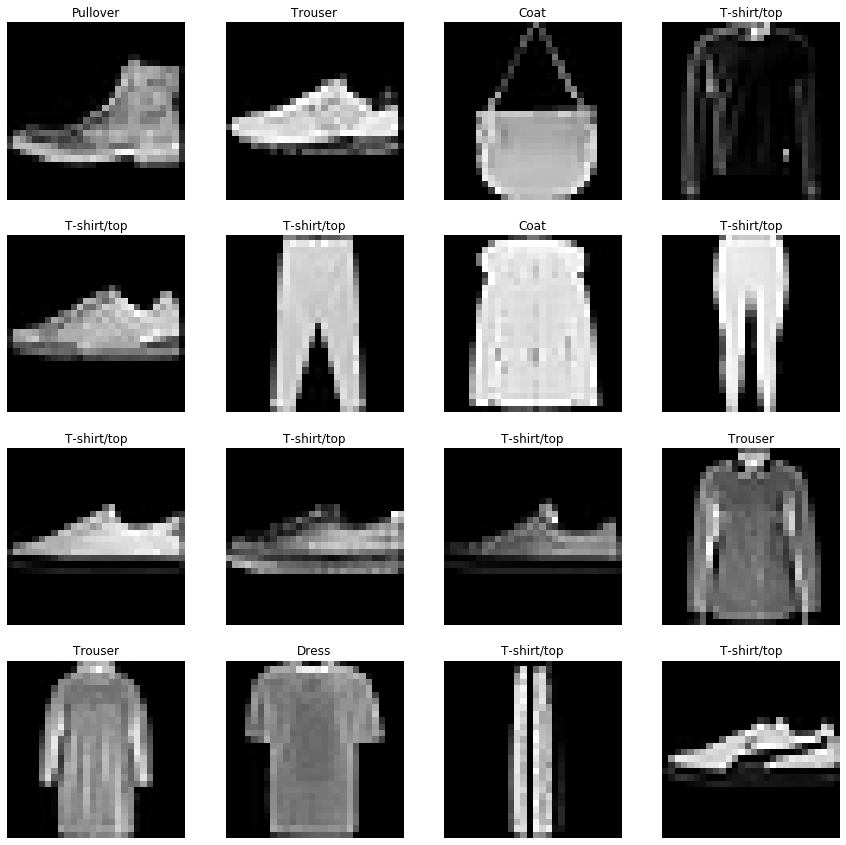

In [11]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df_train.drop(['Label','Id'], axis=1).values[index].reshape(28,28)
        cloths = df_train['Label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [12]:
X_train= df_train.drop(['Label','Id'],axis = 1)
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test = df_train['Label']
X_test

0        4
1        0
2        0
3        4
4        1
        ..
59995    3
59996    0
59997    4
59998    0
59999    2
Name: Label, Length: 60000, dtype: int64

In [15]:
test_ID = df_test['Id']
test_ID = pd.DataFrame(X_ID)
test_ID 

,Id
0,0
1,1
2,2
3,3
4,4
...,...
9995,9995
9996,9996
9997,9997
9998,9998


In [16]:
X_test.shape

(60000,)

In [17]:
y_test = df_test.drop(['Id'],axis = 1)
y_test.shape

(10000, 784)

In [18]:
y_test.shape

(10000, 784)

## Normalisation of the Data 

We are normalizing the data so that the data can be converted into same scale and it is easy to do analysis for the given Data set

In [19]:
# Normalize the data
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_train /= 255.0
y_test /=255.0

## Splitting the data 

We are spitting the data in train and validation data in 90% and 10% respectively so that we can evaluate the model with different parameters and find out which is the best model for analysis. 

In [20]:
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_test, test_size=0.1, random_state = seed)

## Question 1:  Classification:  Feature Extraction +Classical Methods 
## 1.1	Extraction of Design and Implementation choices of your model.
## Describe the underlying algorithms you are using, how they work and why you chose them.


The algorithms which we are using for classification and analysis of the data are:
1)	SVM

2)	KNN

3)	Decision Tree

4)	Random Forest

5)	Gradient Boosting  

For comparison we are first performing all the classification methods on data without feature extraction and then after that we are performing all the algorithms after feature extraction.

How the algorithms work:

1)	SVM (Support Vector Machine): SVM is highly preferred classification which is used as it produces the significant accuracy with less computation power. The objective of the SVM algorithm is to find out the hyperplane in N-dimensional space that distinctly classify the data points.

2)	KNN (K-Nearest Neighbour): KNN method is the supervised learning method which is easy to implement. The algorithm of this method works on the similarity of the objects i.e. how similar things are near to each other.

3)	Decision Tree: It is also one of the supervised learning methods which is used for classification the data. In decision analysis, decision tree can be visually used and explicitly represents the decisions. As, the name suggests it is tree like model having Root, Node and Leaf.


4)	Random Forest: Random forest, as the name suggests consists of large number of individual decision tree that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful for the crowded data set. A large number of relatively uncorrelated models(trees) operating as a committee will outperform any of the individual constituent models.

5)	Gradient Boosting: It Is the machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically in decision trees. It builds the model in a stage-wise fashion like boosting methods do, and it generalizes them by allowing optimization of an ordinary loss function. 







In this problem we are using the above classification techniques for analysis of data. For the comparison we are first applying all the methods without performing feature extraction and them after applying feature extraction.

We have to apply feature extraction as the data set is too large, so it is difficult to analyse the complete data as it takes more computation time.

In this problem we are applying PCA for feature extraction because it the linear method for feature extraction and in non-linear methods the computation time taken by the methods is very large which is not desired whereas by using PCA we are reducing the computation time.

For the analysis of all the methods we have generated the report of each classification methods by using different attributes.
1)	Computation Time: How much time it takes before feature extraction and after feature extraction. It can be noted that before feature extraction it takes more time in comparison to after feature extraction.

2)	Accuracy: The algorithm is how much accurate in both the scenarios i.e. before and after feature extraction.

3)	F1 score: From this we can find the balance between the precision and recall of the method.

4)	 Confusion Matrix: It is the matrix in which the diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those which are mislabeled. The higher the diagonal values of the confusion matrix the better, indicating there are how many predictions.  

5)	 Receiver Operating Characteristics (ROC) Curve: A ROC curve is a graph with x-axis values as the False Positive Rate (FPR) and y-axis values as the True Positive Rate (TPR). The Area Under Curve (AUC) for ROC represents how capable a model is to classify the data correctly.


## 1.2	Implementation of your Design choices:
## Show some of the important code blocks to implement your model. We will also consult your full code  on  LEARN,  so  this  is  your  chance  to  guide  us  to understand your code and how you achieved your result.


## Classification Methods Analysis and Report without Diemnsion Reduction 

In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
import time

# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='rbf', gamma="auto",probability=True,random_state=42)
svc.fit(X_train, y_train)

end1 = time.time()
svm_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=21,random_state=42)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

end2 = time.time()
knn_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100,random_state=42)
random_forest.fit(X_train, y_train)

end3 = time.time()
forest_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy',random_state=42)
tree.fit(X_train, y_train)

end4 = time.time()
tree_time = end4-start4

#Gradient Boosting Method 
start5 = time.time()

Gradient = ensemble.GradientBoostingClassifier(n_estimators=100,random_state=42)
Gradient.fit(X_train, y_train)

end5 = time.time()
gradient_time = end5-start5


print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))
print("Gradient Boosting Time: {:0.2f} minute".format(gradient_time/60.0))

SVM Time: 170.72 minute
KNN Time: 17.73 minute
Random Forest Time: 2.20 minute
Decision Tree Time: 0.83 minute
Gradient Boosting Time: 32.42 minute


## SVM Report and Analysis

-----------------SVM Report---------------
F1 score: 0.8716827123654463
Accuracy score: 0.8719166666666667
Confusion matrix: 
 [[2256  101   20    0    2]
 [ 144 2067  177   27    9]
 [  37  199 1893  194   41]
 [   0   38  217 1981  131]
 [   5   12   26  157 2266]]
Plotting confusion matrix


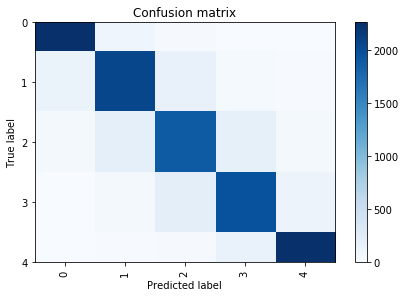

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2379
           1       0.86      0.85      0.85      2424
           2       0.81      0.80      0.81      2364
           3       0.84      0.84      0.84      2367
           4       0.93      0.92      0.92      2466

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [24]:
# SVM report and analysis
y_pred_svc = svc.predict(X_val)
svc_f1 = metrics.f1_score(y_val, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_val, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_val, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_svc))

In [25]:
y_pred_svc = svc.predict_proba((X_val))
y_pred_svc.shape


(12000, 5)

In [27]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_svc[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [28]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [29]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

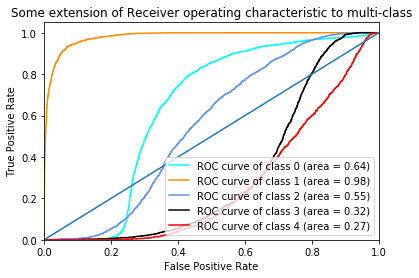

In [30]:
#plotting ROc for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

## KNN Report and Analysis

-----------------K-nearest neighbors Report---------------
F1 score: 0.8328931548275391
Accuracy score: 0.8338333333333333
Confusion matrix: 
 [[2291   80    7    1    0]
 [ 236 1985  157   43    3]
 [ 120  288 1718  207   31]
 [   3   50  269 1910  135]
 [  31   25   41  267 2102]]
Plotting confusion matrix


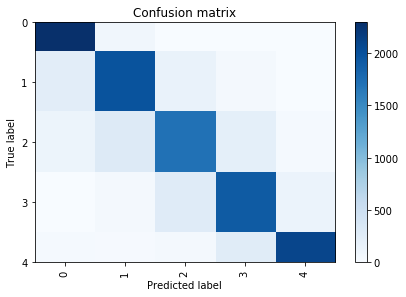

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2379
           1       0.82      0.82      0.82      2424
           2       0.78      0.73      0.75      2364
           3       0.79      0.81      0.80      2367
           4       0.93      0.85      0.89      2466

    accuracy                           0.83     12000
   macro avg       0.83      0.83      0.83     12000
weighted avg       0.83      0.83      0.83     12000



In [31]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_val, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_val, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_val, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm , clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_knn))

In [32]:
y_pred_knn = knn.predict_proba((X_val))
y_pred_knn.shape

(12000, 5)

In [34]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_knn[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [35]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [36]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

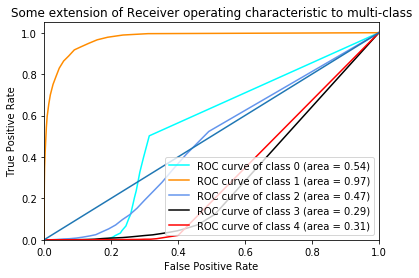

In [37]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 3 is having minimum True Positive Rate.

## Random Forest and Analysis 

-----------------Random Forest Report---------------
F1 score: 0.845653776603606
Accuracy score: 0.8455833333333334
Confusion matrix: 
 [[2235  124   19    0    1]
 [ 143 1981  259   33    8]
 [  34  211 1830  246   43]
 [   0   36  256 1904  171]
 [   9   11   29  220 2197]]
Plotting confusion matrix


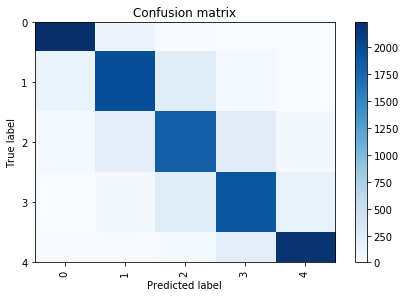

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2379
           1       0.84      0.82      0.83      2424
           2       0.76      0.77      0.77      2364
           3       0.79      0.80      0.80      2367
           4       0.91      0.89      0.90      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [38]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(X_val)
random_forest_f1 = metrics.f1_score(y_val, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_val, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_val, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm,clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_forest))




In [40]:
y_pred_forest = random_forest.predict_proba((X_val))
y_pred_forest.shape

(12000, 5)

In [41]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_forest[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [42]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [43]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

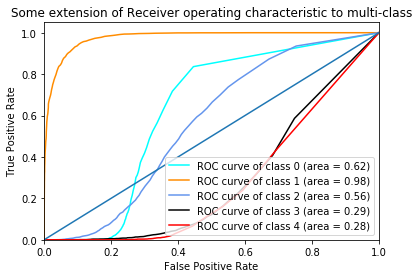

In [44]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

## Decision Tree report and analysis

-----------------Decision Tree Report---------------
F1 score: 0.7211936843801465
Accuracy score: 0.72075
Confusion matrix: 
 [[2032  255   74    6   12]
 [ 255 1636  415   85   33]
 [  89  399 1414  398   64]
 [   6   69  389 1602  301]
 [  18   30   79  374 1965]]
Plotting confusion matrix


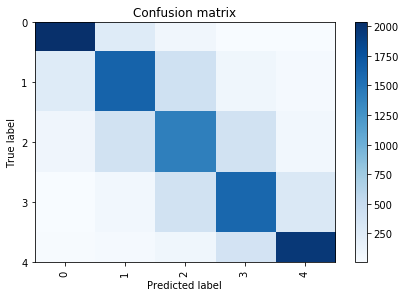

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2379
           1       0.68      0.67      0.68      2424
           2       0.60      0.60      0.60      2364
           3       0.65      0.68      0.66      2367
           4       0.83      0.80      0.81      2466

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000



In [45]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(X_val)
tree_f1 = metrics.f1_score(y_val, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_val, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_val, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_tree))

In [46]:
y_pred_tree = tree.predict_proba((X_val))
y_pred_tree.shape

(12000, 5)

In [47]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_tree[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [48]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [49]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

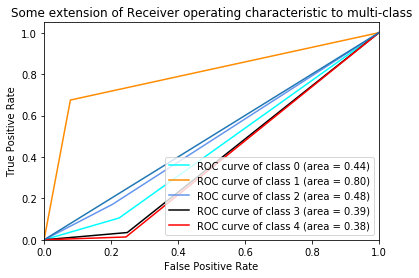

In [50]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

##  Gradient Boosting and analysis

-----------------Gradient boosting Report---------------
F1 score: 0.8016866423460315
Accuracy score: 0.80125
Confusion matrix: 
 [[2153  207   18    0    1]
 [ 194 1861  318   37   14]
 [  41  324 1633  322   44]
 [   0   29  334 1849  155]
 [  16   26   30  275 2119]]
Plotting confusion matrix


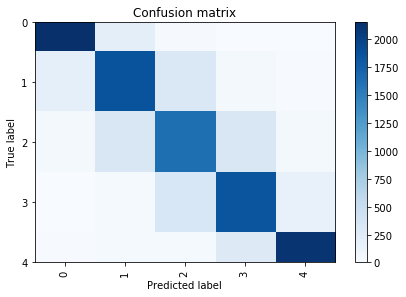

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2379
           1       0.76      0.77      0.76      2424
           2       0.70      0.69      0.70      2364
           3       0.74      0.78      0.76      2367
           4       0.91      0.86      0.88      2466

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



In [53]:
# Gradient Boosting report and analysis
y_pred_gradient = Gradient.predict(X_val)
gradient_f1 = metrics.f1_score(y_val, y_pred_gradient, average= "weighted")
gradient_accuracy = metrics.accuracy_score(y_val, y_pred_gradient)
gradient_cm = metrics.confusion_matrix(y_val, y_pred_gradient)
print("-----------------Gradient boosting Report---------------")
print("F1 score: {}".format(gradient_f1))
print("Accuracy score: {}".format(gradient_accuracy))
print("Confusion matrix: \n", gradient_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(gradient_cm, clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_gradient))

In [54]:
y_pred_gradient = Gradient.predict_proba((X_val))
y_pred_gradient.shape

(12000, 5)

In [55]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_gradient[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [56]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [57]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

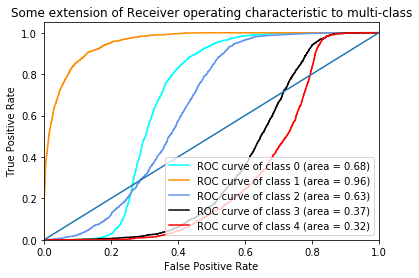

In [58]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

# Feature Extraction

Now above we have done the analysis without feature extraction now we will be doing the analysis using Feature Extraction and comapare the resukts for both the analysis in the end.

## PCA Analysis and Performing the classification methods 

We are using PCA for Feature Extraction which is the linear method as and takes comparitively less computation time in comparision to non-linear methods as the dataset is very large so it is taking too much time for computation.

In [25]:
# Performing PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=42)
X_train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)
y_test_pca =pca.transform(y_test)

In [26]:
X_train_pca.shape

(54000, 20)

In [27]:
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_train_PCA1.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7.930918,2.932807,-1.893060,-0.977458,0.663089,-2.527497,-2.096613,0.119818,0.710871,0.895814,0.761333,0.113093,-0.452113,0.557060,0.282450,-0.745237,0.011659,0.236203,0.326121,-0.668195
1,-6.471186,-1.638698,-1.331555,-0.329385,0.244570,0.140477,0.087647,0.045231,0.447244,-0.701444,0.920300,0.166795,-0.113971,0.166775,-0.467000,-0.700208,0.828226,0.189347,0.212386,0.239392
2,2.447989,1.769704,-3.950919,1.607801,-0.337273,-2.180662,0.737468,-0.307470,-0.905666,-0.520892,-1.717978,0.664124,-0.504243,0.454012,-0.327327,0.839867,-0.539295,-0.746008,-0.158263,0.197403
3,-3.293750,6.070544,4.276641,-0.350756,-1.287390,0.198865,-2.120989,1.125194,-1.471734,-1.652311,-0.715104,-0.118208,0.013077,0.150355,-0.286576,0.927102,-0.566949,0.279994,0.252969,0.234743
4,3.333557,-4.397161,2.942229,-2.497389,0.472214,-0.899537,-0.302751,-0.556801,0.829282,0.340332,-0.446822,-1.075029,0.196225,-1.009725,-0.854071,-1.062209,-0.129617,-0.160440,0.072833,1.240649


In [28]:
X_train_PCA1.shape

(54000, 20)

In [29]:
X_test_PCA1 = pd.DataFrame(X_test_pca)
X_test_PCA1.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.686579,2.369053,-2.407773,0.289971,-1.490966,-0.634578,-0.520400,-0.646258,0.045032,-0.374264,0.683081,0.926843,-0.459156,-0.163412,-0.019288,-0.070682,-0.108108,0.831726,-1.651554,-0.561045
1,-3.809072,-0.739449,0.713820,0.761372,-1.456830,-0.881039,0.704940,-1.117531,1.829718,1.254772,1.114708,-0.394182,0.169506,1.192595,-0.777064,0.304227,0.332252,-0.489583,-0.192360,-1.123225
2,5.299521,1.645026,-1.935265,-1.225035,-3.938194,0.272222,1.531356,-0.568066,-0.350720,-2.477775,2.031629,-0.678280,-0.356437,0.566982,0.359919,0.400954,0.192872,1.020908,-0.685300,0.427377
3,5.116883,2.858536,-3.550710,2.430912,-0.959493,0.214864,2.482258,-1.535851,-1.540610,-1.546822,-0.928261,0.912208,-0.227777,0.510341,-0.210631,0.936529,0.348542,-0.676388,0.092721,-0.232775
4,1.698128,-6.289247,1.605808,-2.213029,-1.550452,-1.717971,1.681988,0.965670,-1.501439,1.123053,-0.364384,0.225818,-0.024347,0.508891,0.174759,0.239608,-1.629331,0.561999,-0.119914,0.196783


### Classification Methods Analysis and Report

In [30]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
import time

# SVM Model
start1 = time.time()

svc = SVC(C=13, kernel='rbf', gamma="auto",probability = True)
svc.fit(X_train_PCA1, y_train)

end1 = time.time()
svm_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_PCA1, y_train)
y_pred_knn = knn.predict(X_test_PCA1)

end2 = time.time()
knn_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_PCA1, y_train)

end3 = time.time()
forest_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(X_train_PCA1, y_train)

end4 = time.time()
tree_time = end4-start4

#Gradient Boosting Method 
start5 = time.time()

Gradient = ensemble.GradientBoostingClassifier(n_estimators=100)
Gradient.fit(X_train_PCA1, y_train)

end5 = time.time()
gradient_time = end5-start5



print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))
print("Gradient Boosting Time: {:0.2f} minute".format(gradient_time/60.0))

SVM Time: 8.23 minute
KNN Time: 0.06 minute
Random Forest Time: 1.73 minute
Decision Tree Time: 0.11 minute
Gradient Boosting Time: 2.20 minute


#### SVM report and analysis

-----------------SVM Report---------------
F1 score: 0.8977215090594863
Accuracy score: 0.8978333333333334
Confusion matrix: 
 [[1189   46    8    0    1]
 [  50 1063   66   13    1]
 [  14   71  996   58   21]
 [   1   33   75 1065   69]
 [   1    4   19   62 1074]]
Plotting confusion matrix


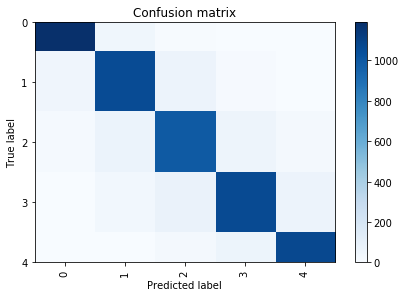

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1244
           1       0.87      0.89      0.88      1193
           2       0.86      0.86      0.86      1160
           3       0.89      0.86      0.87      1243
           4       0.92      0.93      0.92      1160

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



In [31]:
# SVM report and analysis
y_pred_svc = svc.predict(X_test_pca)
svc_f1 = metrics.f1_score(y_val, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_val, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_val, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_svc))

In [32]:
y_pred = svc.predict_proba((X_test_pca))
y_pred.shape


(6000, 5)

In [33]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [34]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [35]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

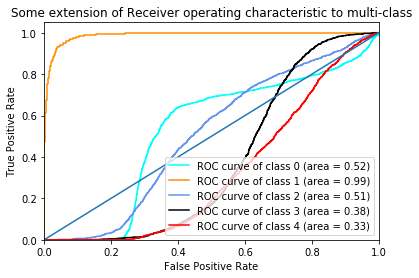

In [36]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

#### KNN report and analysis

In [ ]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_val, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_val, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_val, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm , clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_knn))

In [ ]:
y_pred_knn = knn.predict_proba((X_test_pca))
y_pred_knn.shape

In [ ]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_knn[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [ ]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

In [ ]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#### Random Forest report and analysis

In [ ]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(X_test_pca)
random_forest_f1 = metrics.f1_score(y_val, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_val, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_val, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm,clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_forest))

In [40]:
y_pred_forest = random_forest.predict_proba(X_test_pca)
y_pred_forest.shape

(6000, 5)

In [41]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_forest[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])


In [42]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


In [43]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])


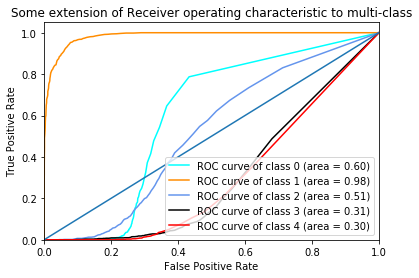

In [44]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

#### Decision Tree report and analysis

-----------------Decision Tree Report---------------
F1 score: 0.8147705855704446
Accuracy score: 0.8148333333333333
Confusion matrix: 
 [[1129   68   41    0    6]
 [  83  943  123   33   11]
 [  39  104  855  126   36]
 [   4   42  129  955  113]
 [   5    8   45   95 1007]]
Plotting confusion matrix


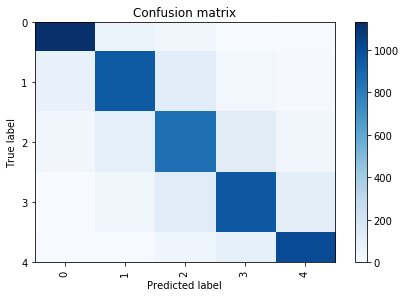

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1244
           1       0.81      0.79      0.80      1193
           2       0.72      0.74      0.73      1160
           3       0.79      0.77      0.78      1243
           4       0.86      0.87      0.86      1160

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.81      0.81      0.81      6000



In [45]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(X_test_pca)
tree_f1 = metrics.f1_score(y_val, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_val, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_val, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_tree))

In [46]:
y_pred_tree = tree.predict_proba(X_test_pca)
y_pred_tree.shape

(6000, 5)

In [47]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_forest[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])


In [48]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


In [49]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])


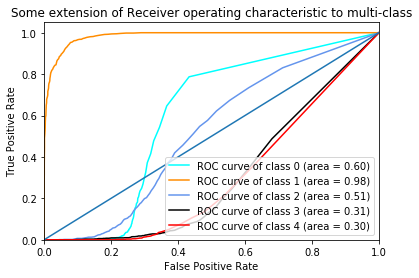

In [50]:
#plotting ROC for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

#### Gradient Boosting report and analysis

-----------------Gradient boosting Report---------------
F1 score: 0.824197256834588
Accuracy score: 0.8236666666666667
Confusion matrix: 
 [[1128   95   21    0    0]
 [  85  964  119   16    9]
 [  39  126  869  108   18]
 [   1   30  138  997   77]
 [   3   21   43  109  984]]
Plotting confusion matrix


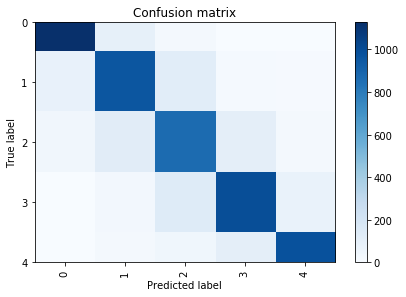

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1244
           1       0.78      0.81      0.79      1193
           2       0.73      0.75      0.74      1160
           3       0.81      0.80      0.81      1243
           4       0.90      0.85      0.88      1160

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.83      0.82      0.82      6000



In [51]:
# Gradient Boosting report and analysis
y_pred_gradient = Gradient.predict(X_test_pca)
gradient_f1 = metrics.f1_score(y_val, y_pred_gradient, average= "weighted")
gradient_accuracy = metrics.accuracy_score(y_val, y_pred_gradient)
gradient_cm = metrics.confusion_matrix(y_val, y_pred_gradient)
print("-----------------Gradient boosting Report---------------")
print("F1 score: {}".format(gradient_f1))
print("Accuracy score: {}".format(gradient_accuracy))
print("Confusion matrix: \n", gradient_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(gradient_cm, clothing)
plt.show()

print(metrics.classification_report(y_val, y_pred_gradient))

In [52]:
y_pred_gradient = Gradient.predict_proba(X_test_pca)
y_pred_gradient.shape

(6000, 5)

In [53]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
n_classes = 5
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_forest[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [54]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [55]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

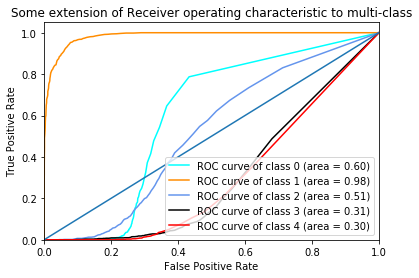

In [66]:
#plotting ROc for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


The above ROC curve is drawn for True Positive Rate vs False Positive Rate. The area under the curve for all the labels (0,1,2,3,4) is shown in the curve which means that how many true positive values are predicted by the method for each curve as well as the False Positive values. The straight Line passing through Origin states us the AUC which is 0.5 which is used to discriminate the values. So, in the above curve we can see that label 1 is having the maximum True Positive rate whereas label 4 is having minimum True Positive Rate.

# Prediction on Test Data For Kaggle Competition

After analysing all the parameters we have found out that SVM is the best method to predict the labels for the test data.

In [89]:
#predict on test data
data=SVC(C=13,kernel='rbf',gamma=0.01)
data.fit(X_train_pca, y_train)
Y_Data = data.predict(y_test_pca)
print(Y_Data.shape)



(10000,)


In [90]:
y_pred_model = pd.DataFrame(Y_Data)
y_pred_model

,0
0,4
1,4
2,0
3,1
4,1
...,...
9995,3
9996,1
9997,3
9998,2


In [91]:
del X_ID['Label']

In [92]:
X_ID.insert(1,'Label',y_pred_model)

In [93]:
X_ID

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,3
9996,9996,1
9997,9997,3
9998,9998,2


In [94]:
X_ID.to_csv("Predicted_Labels.csv",index=False)

In [95]:
X_ID

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,3
9996,9996,1
9997,9997,3
9998,9998,2


## Kaggle Competition

After Submitting in kaggle we have got the accuracy eaual to 89.680%

## 1.4: Results Analysis



## Runtime performance for training and testing.

### Runtime performace of all the methods without feature extraction

### SVM>Gradient Boosting>KNN>Random forest>Desion Tree

SVM Time: 170.72 minute

KNN Time: 17.73 minute

Random Forest Time: 2.20 minute

Decision Tree Time: 0.83 minute

Gradient Boosting Time: 32.42 minute

### Runtime performace of all the methods with feature extraction

### SVM>Gradient Boosting>Random Forest>Decion Tree>KNN

SVM Time: 8.23 minute

KNN Time: 0.06 minute

Random Forest Time: 1.73 minute

Decision Tree Time: 0.11 minute

Gradient Boosting Time: 2.20 minute

From the above runtime performance we can observe that the time taken by all the methods is more when we have not done the feature extraction whereas it takes very less time eith feature extraction. 

There is significant decrease of the time in SVM when we have applied the feature extraction to it same for KNN and Gradient Boosting whereas the time taken by random forest and Decision tree is comparitively less.


## Comparison of the different algorithms and parameters you tried

We have applied the methods which are stated below as weel as the parameters on data with and without Feature Extraction:

In this we have used different algorithms to find out the best method which can be used to predict the test data:

1) SVM

2) KNN

3) Random Forest

4) Decision Tree

5) Gradient Boosting 


Parameters which we have used to find the best method are:

1) Computation Time

2) Accuracy 

3) F1 Score 

4) Confusion Matrix


## Computation Time

### Without Feature Extraction 

### SVM>Gradient Boosting>KNN>Random forest>Desion Tree

SVM Time: 170.72 minute

KNN Time: 17.73 minute

Random Forest Time: 2.20 minute

Decision Tree Time: 0.83 minute

Gradient Boosting Time: 32.42 minute


### With Feature Extraction

### SVM>Gradient Boosting>Random Forest>Decion Tree>KNN

SVM Time: 8.23 minute

KNN Time: 0.06 minute

Random Forest Time: 1.73 minute

Decision Tree Time: 0.11 minute

Gradient Boosting Time: 2.20 minute

From the above computation time we can observe that the time taken by all the methods is more when we have not done the feature extraction whereas it takes very less time with feature extraction. 

There is significant decrease of the time in SVM when we have applied the feature extraction to it same for KNN and Gradient Boosting whereas the time taken by random forest and Decision tree is comparitively less.

## Accuracy 

### Without Feature Extraction 

### SVM>Random forest>KNN>Gradient Boosting>Decison tree

SVM:87.19

KNN:83.28

Random Forest:84.58

Decision Tree:72.19

Gradient Boosting:80.96

### With Feature Extraction

### SVM>Random Forest>KNN>Gradient Boosting>Decision Tree

SVM:89.88

KNN:86.88

Random Forest:88.28

Decision Tree:82.26

Gradient Boosting:80.96


From the above data we can see that the accuracy has increased after feature extraction and trend is almost same except Gradient Boosting is having same accuracy in both the cases. 
As in both the cases SVM is having highest accuracy which is 89.88% 

## F1 Score

### Without Feature Extraction 

### SVM>Random forest>KNN>Gradient Boosting>Decison tree

SVM:0.87

KNN:0.83

Random Forest:.084

Decision Tree:0.72

Gradient Boosting:0.80

### With Feature Extraction

### SVM>Random Forest>KNN>Gradient Boosting>Decision Tree

SVM:.89

KNN:0.86

Random Forest:0.88

Decision Tree:0.82

Gradient Boosting:0.80


From the above data we can see that the F1 score has increased after feature extraction and trend is almost same except Gradient Boosting is having same accuracy in both the cases. 
As in both the cases SVM is having highest accuracy which is 0.89 

## Confusion Matrix 

### Without Feature Extraction 

### SVM>Random forest>KNN>Gradient Boosting>Decison tree

### With Feature Extraction

### SVM>Random Forest>KNN>Gradient Boosting>Decision Tree

As we have observed that the methods which are having more accuracy are having more correct prediction so the daigonal elements of SVM will be highest and so on.

## Explanation of your model (algorithms, design choices, numbers of parameters)

The algorithms which we are using for classification and analysis of the data are: 

1) SVM

2) KNN

3) Decision Tree

4) Random Forest

5) Gradient Boosting 

For comparison we are first performing all the classification methods on data without feature extraction and then after that we are performing all the algorithms after feature extraction.
How the algorithms work:

1) SVM (Support Vector Machine): SVM is highly preferred classification which is used as it produces the significant accuracy with less computation power. The objective of the SVM algorithm is to find out the hyperplane in N-dimensional space that distinctly classify the data points
.
2) KNN (K-Nearest Neighbour): KNN method is the supervised learning method which is easy to implement. The algorithm of this method works on the similarity of the objects i.e. how similar things are near to each other. 

3) Decision Tree: It is also one of the supervised learning methods which is used for classification the data. In decision analysis, decision tree can be visually used and explicitly represents the decisions. As, the name suggests it is tree like model having Root, Node and Leaf.

4) Random Forest: Random forest, as the name suggests consists of large number of individual decision tree that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful for the crowded data set. A large number of relatively uncorrelated models(trees) operating as a committee will outperform any of the individual constituent models.

5) Gradient Boosting: It Is the machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically in decision trees. It builds the model in a stage-wise fashion like boosting methods do, and it generalizes them by allowing optimization of an ordinary loss function. 

In this problem we are using the above classification techniques for analysis of data. For the comparison we are first applying all the methods without performing feature extraction and them after applying feature extraction.
We have to apply feature extraction as the data set is too large, so it is difficult to analyse the complete data as it takes more computation time.

In this problem we are applying PCA for feature extraction because it the linear method for feature extraction and in non-linear methods the computation time taken by the methods is very large which is not desired whereas by using PCA we are reducing the computation time.

For the analysis of all the methods we have generated the report of each classification methods by using different attributes.
1)	Computation Time: How much time it takes before feature extraction and after feature extraction. It can be noted that before feature extraction it takes more time in comparison to after feature extraction.

2)	Accuracy: The algorithm is how much accurate in both the scenarios i.e. before and after feature extraction.

3)	F1 score: From this we can find the balance between the precision and recall of the method.

4)	 Confusion Matrix: It is the matrix in which the diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those which are mislabeled. The higher the diagonal values of the confusion matrix the better, indicating there are how many predictions.  

5)	 Receiver Operating Characteristics (ROC) Curve: A ROC curve is a graph with x-axis values as the False Positive Rate (FPR) and y-axis values as the True Positive Rate (TPR). The Area Under Curve (AUC) for ROC represents how capable a model is to classify the data correctly.


##  Use a ROC curve used for some method in your initial or results analysis such as exploring the impact on accuracy of some parameter.

1) ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

2) ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

3) For the above data we have drawn ROC curve for each method both without feature extraction and with feature extraction in which we can see that AUC for each label in the class as well as the AUC for each curve is the straight line which is passing through the origin which is different for each method.  

4) Analysis of the ecah curve is shown along with the ROC curve. As in the each method we have seen that the AUC is 0.5 and values above that are better than the values whih are coming below that line. So, from the above analysis we can see that   label 1 is having more True Predicting rate in comparision to other labels and Label 4 and 3 are having less True predicting value.

## Evaluate your code with other metrics on the training data (by using some of it as test data) and argue for the benefit of you approach.



In this code we have splited the train data into Train and Test to evaluate that which model is suited best to predict the labels for the test Data.

To find out that which model is best we have used different parameters which are:

1) Computation Time

2) Accuracy 

3) F1 Score 

4) Confusion Matrix

By this we have evaluated alll the models by using the above parameters and then done the comparision for each method. We have evaluated the code with matrices and found out the following results.





## Accuracy 

### Without Feature Extraction 

### SVM>Random forest>KNN>Gradient Boosting>Decison tree

SVM:87.19

KNN:83.28

Random Forest:84.58

Decision Tree:72.19

Gradient Boosting:80.96

### With Feature Extraction

### SVM>Random Forest>KNN>Gradient Boosting>Decision Tree

SVM:89.88

KNN:86.88

Random Forest:88.28

Decision Tree:82.26

Gradient Boosting:80.96


From the above data we can see that the accuracy has increased after feature extraction and trend is almost same except Gradient Boosting is having same accuracy in both the cases. 
As in both the cases SVM is having highest accuracy which is 89.88% 

## F1 Score

### Without Feature Extraction 

### SVM>Random forest>KNN>Gradient Boosting>Decison tree

SVM:0.87

KNN:0.83

Random Forest:.084

Decision Tree:0.72

Gradient Boosting:0.80

### With Feature Extraction

### SVM>Random Forest>KNN>Gradient Boosting>Decision Tree

SVM:.89

KNN:0.86

Random Forest:0.88

Decision Tree:0.82

Gradient Boosting:0.80


From the above data we can see that the F1 score has increased after feature extraction and trend is almost same except Gradient Boosting is having same accuracy in both the cases. 
As in both the cases SVM is having highest accuracy which is 0.89 

## Confusion Matrix 

### Without Feature Extraction 

### SVM>Random forest>KNN>Gradient Boosting>Decison tree

### With Feature Extraction

### SVM>Random Forest>KNN>Gradient Boosting>Decision Tree

As we have observed that the methods which are having more accuracy are having more correct prediction so the daigonal elements of SVM will be highest and so on.